In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


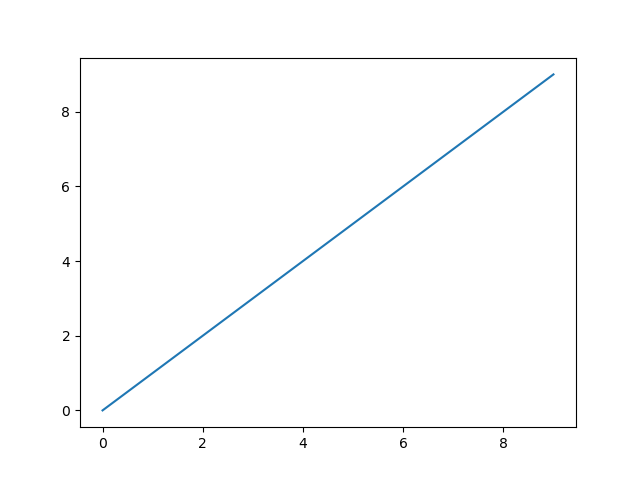

In [3]:
plt.plot(data)

# Figure和Subplot
- matplotlib的图像都位于Figure对象中

<IPython.core.display.Javascript object>


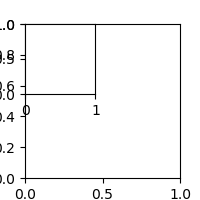

In [6]:
fig = plt.figure(figsize = (2,2))

- 不能通过空Figure绘图。必须用add_subplot创建一个或多个subplot才行

<IPython.core.display.Javascript object>


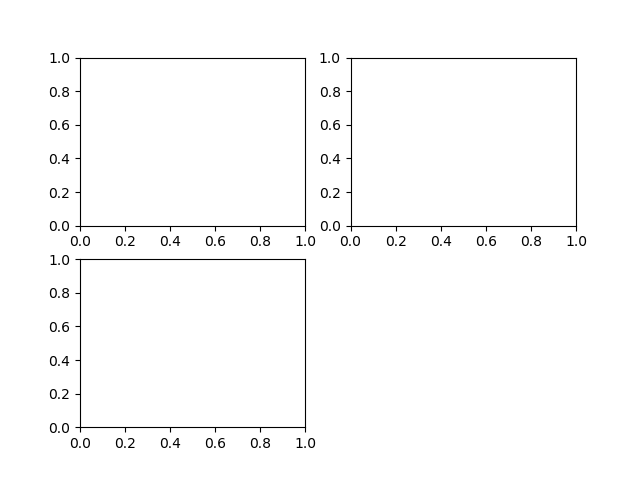

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

<IPython.core.display.Javascript object>


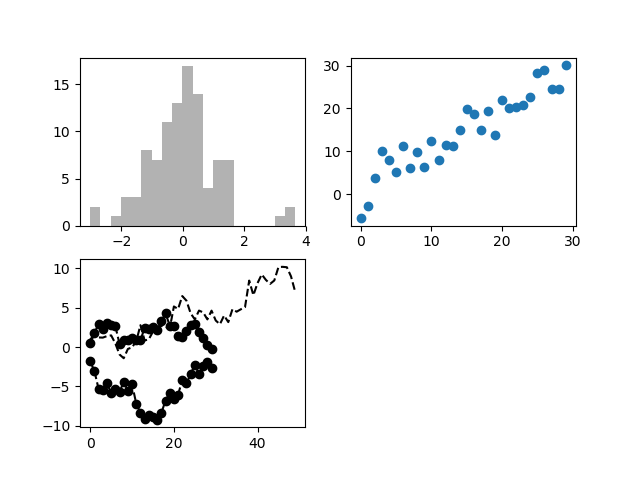

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
# 若没有指定ax对象，则默认成像在最后1个子图中。
plt.plot(np.random.randn(50).cumsum(),'k--')

In [25]:
ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))
# AxesSubplot实例对象调用方法在对应的子图里成像。

fig, axes = plt.subplots(2, 3)
axes
# axessubplot对象的Numpy数组，通过索引调用子图

可以通过sharex和sharey指定subplot应该具有相同的X
轴或Y轴。在比较相同范围的数据时，这也是非常实用的，否则，matplotlib会自
动缩放各图表的界限。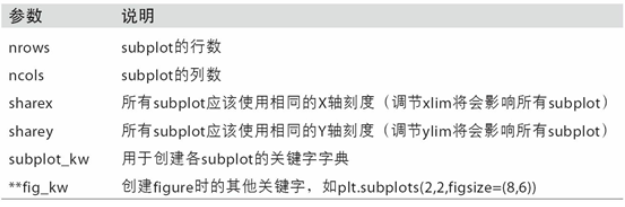

## 调整subplot周围的间距
- 默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留
下一定的间距。
- 间距跟图像的高度和宽度有关，因此，如果你调整了图像大小（不管是编程还是手工），间距也会自动调整。
- 利用Figure的subplots_adjust方法可以轻而易举地修改间距，此外，它也是个顶级函数
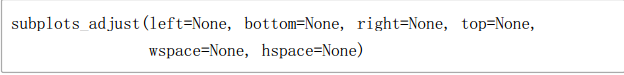

<IPython.core.display.Javascript object>


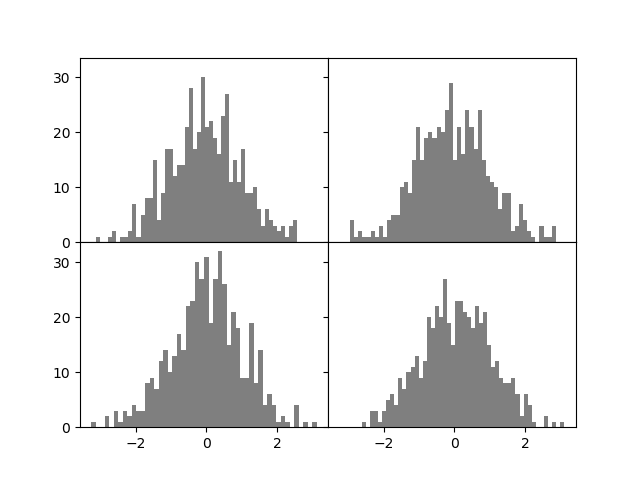

0 0
0 1
1 0
1 1


In [39]:
# wspace和hspace用于控制宽度和高度的百分比，可以用作subplot之间的间距。
# 下面是一个简单的例子，其中我将间距收缩到了0
import itertools
fig, axes = plt.subplots(2,2,sharex=True,sharey=True)
for i, j in itertools.product(range(2),range(2)):
    print(i,j)
#     print(tu)
#     i, j = tu
    axes[i, j].hist(np.random.randn(500), bins=50, color='k',alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

## 颜色、标记和线型

- 线图可以使用标记强调数据点。因为matplotlib可以创建连续线图，在点之间进行
插值，因此有时可能不太容易看出真实数据点的位置。标记也可以放到格式字符串
中，但标记类型和线型必须放在颜色后面

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


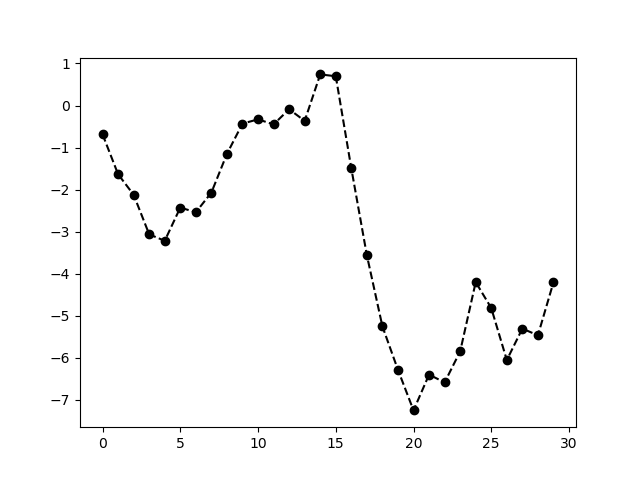

In [45]:
from numpy.random import randn
%matplotlib
plt.plot(randn(30).cumsum(),'ko--')


<IPython.core.display.Javascript object>


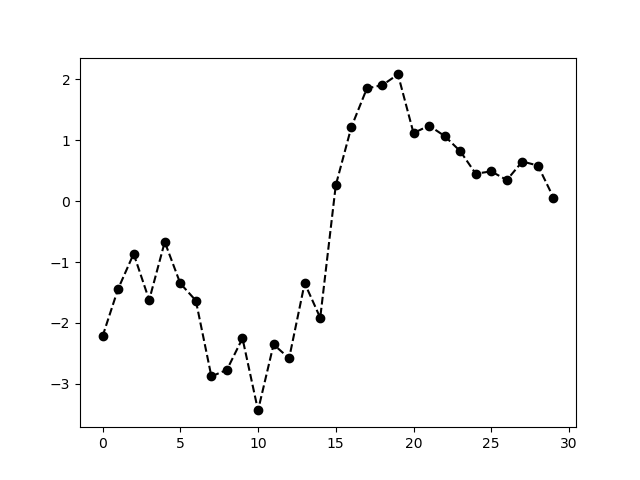

In [46]:
# 完整代码
plt.plot(randn(30).cumsum(),color= 'k',linestyle='dashed',marker='o')

- 在线型图中，非实际数据点默认是按线性方式插值的。可以通过drawstyle选项修改

<IPython.core.display.Javascript object>


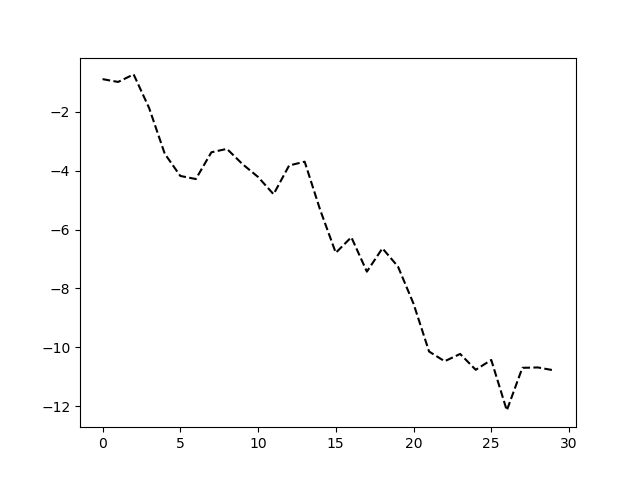

In [47]:
data = np.random.randn(30).cumsum()
plt.plot(data,'k--',label='default')

<IPython.core.display.Javascript object>


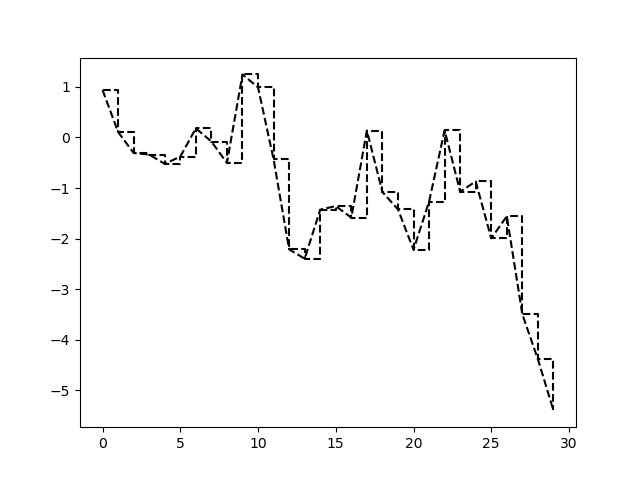

In [51]:
data = np.random.randn(30).cumsum()
plt.plot(data,'k--',label='default')
plt.plot(data,'k--',drawstyle='steps-post', label='steps-post')

## 刻度、标签和图例
plt.xlim([0,10]),只对当前或最近创建的AxesSubplot起作用。
在subplot子图对象上则用ax.get_xlim和ax.set_xlim。

## 设置标题、轴标签、刻度以及刻度标签

<IPython.core.display.Javascript object>


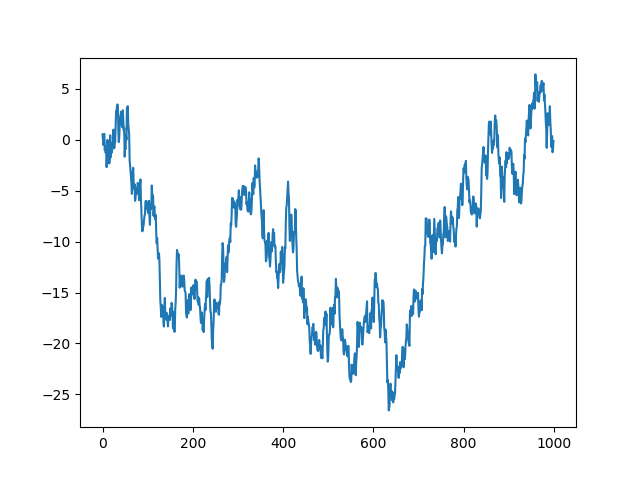

In [52]:
# 随机漫步
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

<IPython.core.display.Javascript object>


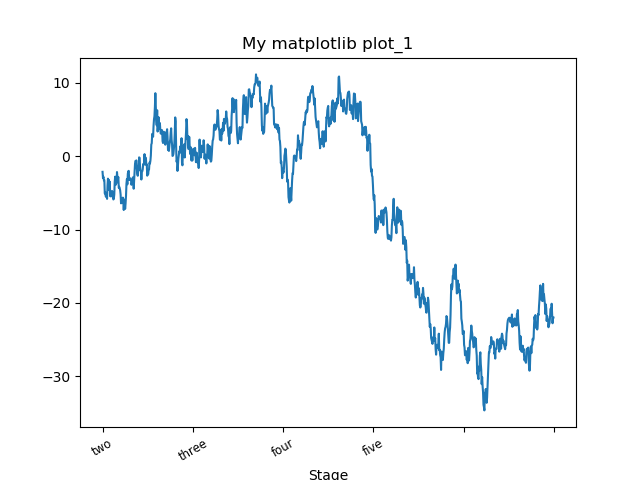

Text(0.5,0,'Stage')

In [65]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
# ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')
ax.set_title("My matplotlib plot_1")
ax.set_xlabel('Stage')

In [61]:
ax.set_title("My matplotlib plot_1")

Text(0.5,1,'My matplotlib plot_1')

<IPython.core.display.Javascript object>


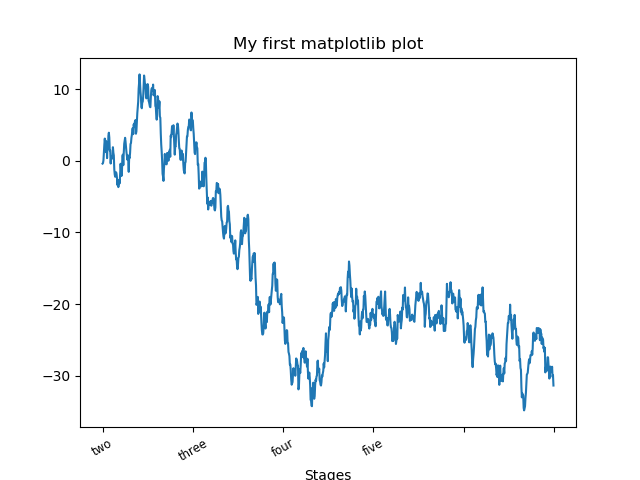

[Text(0.5,0,'Stages'), Text(0.5,1,'My first matplotlib plot')]

In [66]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
# ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

# 添加图例（legend）

<IPython.core.display.Javascript object>


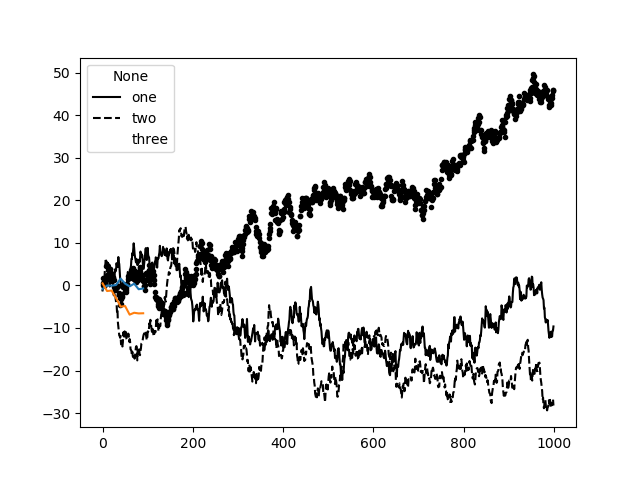

In [72]:
from numpy.random import randn

fig = plt.figure();ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k',label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

oc告诉matplotlib要将图例放在哪。如果你不是吹毛求疵的话，"best"是不错的
选择，因为它会选择最不碍事的位置。要从图例中去除一个或多个元素，不传入
label或传入label='nolegend'即可。

## 注解以及在Subplot上绘图
- 除标准的绘图类型，你可能还希望绘制一些子集的注解，可能是文本、箭头或其他
图形等。
- 注解和文字可以通过text、arrow和annotate函数进行添加。
- text可以将文本绘制在图表的指定坐标(x,y)，还可以加上一些自定义格式

<IPython.core.display.Javascript object>


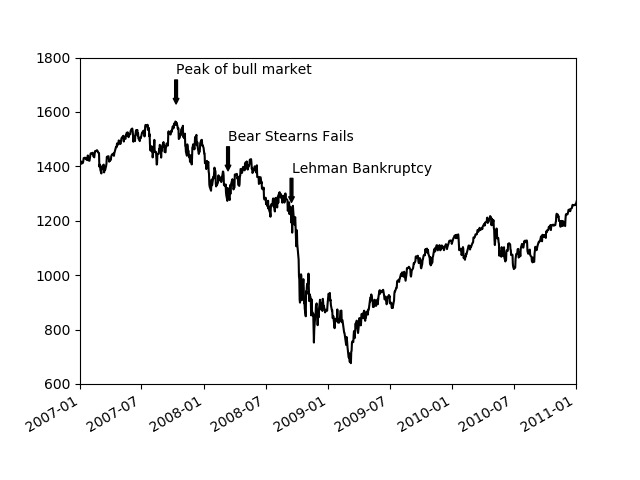

(600, 1800)

In [79]:
from datetime import datetime
import pandas as pd
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
  
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

# ax.set_title('Important dates in the 2008-2009 financial crisis')

画图形，先创建1个图形实例，如矩rectangle、多边形polygon。然后通过ax.add_patch(实例)添加到subplot中

<IPython.core.display.Javascript object>


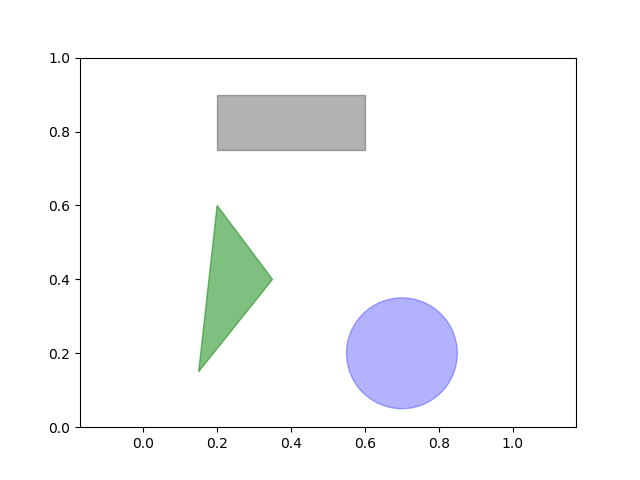

In [88]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
# 矩形实例，第一个para代表左下角坐标，之后的para依次为长宽。
ax.add_patch(rect)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
# 圆形实例，para依次为圆心，半径。看起来不是圆形是因为像素显示原因，使用ax.axis('equal')解决。
ax.axis('equal')
ax.add_patch(circ)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(pgon)

## 将图表保存到文件
- plt.savefig(path)

- 在发布图片时最常用到两个重要的选项是dpi（控制“每英寸点数”分辨率）和bbox_inches（可以剪除当前图表周围的空白部分）。要得到一张
带有最小白边且分辨率为400DPI的PNG图片，你可以

In [89]:
plt.savefig('test1.png', dpi=400, bbox_inches='tight')

In [90]:
plt.savefig('test2.png', dpi=400, bbox_inches='tight')

- savefig并非一定要写入磁盘，也可以写入任何文件型的对象，比如BytesIO：

In [92]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
plot_data

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x80\x00\x00\x01\xe0\x08\x06\x00\x00\x005\xd1\xdc\xe4\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0fa\x00\x00\x0fa\x01\xa8?\xa7i\x00\x00\x009tEXtSoftware\x00matplotlib version 2.2.2, http://matplotlib.org/\x86\x9f\xd4\x0b\x00\x00 \x00IDATx\x9c\xec\xdd{\\Tu\xfe?\xf0\xd7\x99\xf1\x8a&\xa9\x91h\x03d+]\xdc\xd4.bJ\xf9\x95\xc8\xe4Qi\xb5kd\x17M\x8b\x00\xb3-oxw\xcbJE\x06\xd4e\xb7\x9f&\x97\x92\xac\xcd\xc8\xb6\x8b\xd6\xe6%G\xb7\xd4\x04-M+\rM\x94\x93\x90y\t\xc4{\xcc\xe7\xf7\x07;g\xe7r\xce\xcc\x19\x18\x18\x98y=\x1f\x8f\xf3x\xc09\x9fs\xceg\x06t\xde|>\xe7\xf3~KB\x08\x01""""\n\x1a\x06\x7fw\x80\x88\x88\x88\x88\x1a\x17\x03@"""\xa2 \xc3\x00\x90\x88\x88\x88(\xc80\x00$"""\n2\x0c\x00\x89\x88\x88\x88\x82\x0c\x03@"""\xa2 \xc3\x00\x90\x88\x88\x88(\xc80\x00$"""\n2\x0c\x00\x89\x88\x88\x88\x82\x0c\x03@"""\xa2 \xc3\x00\x90\x88\x88\x88(\xc80\x00$"""\n2\x0c\x00\x89\x88\x88\x88\x82\x0c\x03@"""\xa2 \xc3\x00\x90\x88\x88\x88(\xc80\x00$"""\n2\x

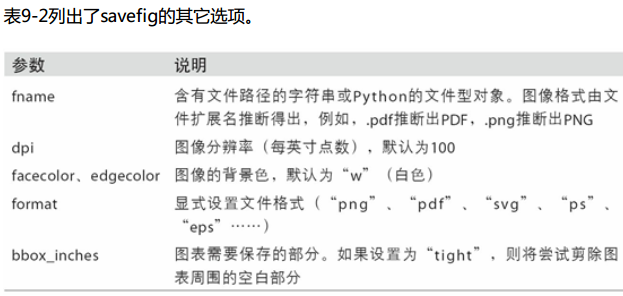

## matplotlib配置
- matplotlib自带一些配色方案，以及为生成出版质量的图片而设定的默认配置信息。
- 幸运的是，几乎所有默认行为都能通过一组全局参数进行自定义，它们可以管
理图像大小、subplot边距、配色方案、字体大小、网格类型等。
- 一种Python编程方式配置系统的方法是使用rc方法。

提示：引入seaborn会修改matplotlib默认的颜色方案和绘图类型，以提高可
读性和美观度。即使你不使用seaborn API，你可能也会引入seaborn，作为提
高美观度和绘制常见matplotlib图形的简化方法。

# 9.2 使用pandas和seaborn绘图
## 线形图

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


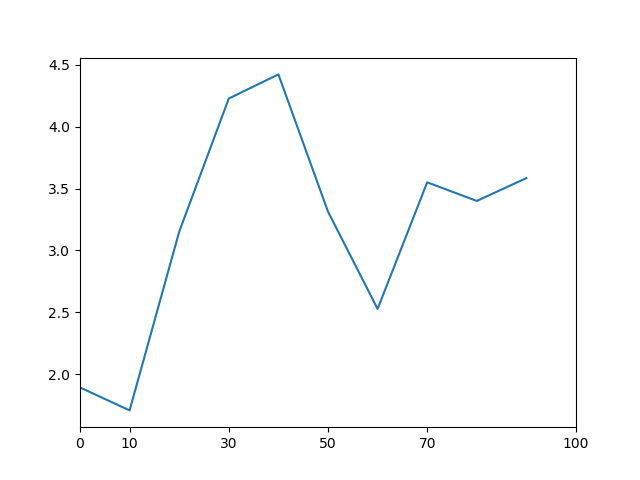

In [102]:
%matplotlib
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot(xlim=[0,100], xticks=[0,10,30,50,70,100])

# plt.show()

该Series对象的索引会被传给matplotlib，并用以绘制X轴。可以通过
use_index=False禁用该功能。X轴的刻度和界限可以通过xticks和xlim选项进行调
节，Y轴就用yticks和ylim。plot参数的完整列表请参见表9-3

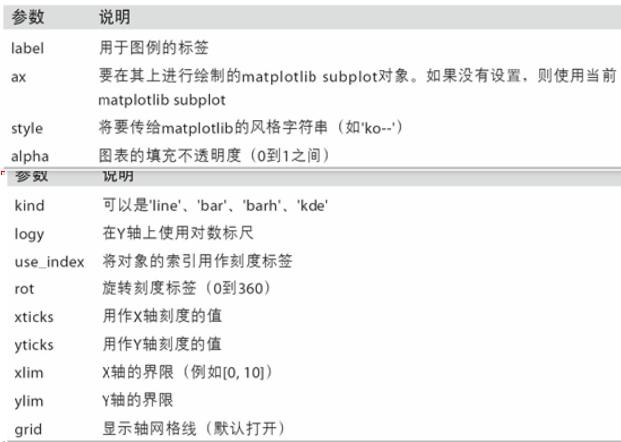

- pandas的大部分绘图方法都有一个可选的ax参数，它可以是一个matplotlib的
subplot对象。这使你能够在网格布局中更为灵活地处理subplot的位置。
- DataFrame的plot方法会在一个subplot中为各列绘制一条线，并自动创建图例

<IPython.core.display.Javascript object>


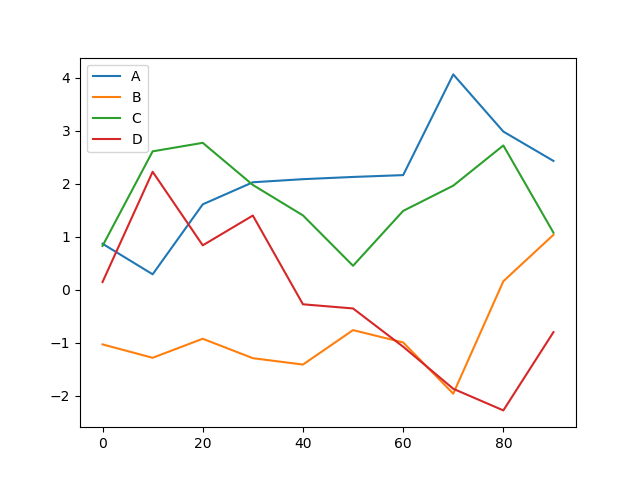

In [105]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns=["A","B",'C','D'],
                         index = np.arange(0,100,10))
df.plot()

- plot属性包含一批不同绘图类型的方法。例如，df.plot()等价于df.plot.line()。后面会学习这些方法。
- 笔记：plot的其他关键字参数会被传给相应的matplotlib绘图函数，所以要更深入地自定义图表，就必须学习更多有关matplotlib API的知识。
- DataFrame还有一些用于对列进行灵活处理的选项，例如，是要将所有列都绘制到一个subplot中还是创建各自的subplot。详细信息请参见表9-4

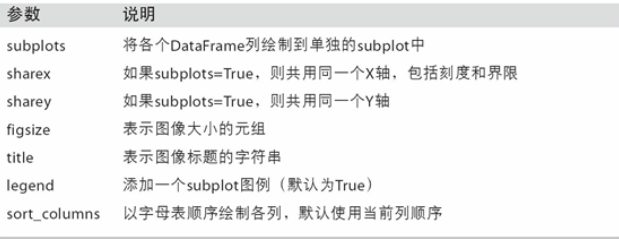

# 柱状图
- plot.bar()和plot.barh()分别绘制水平和垂直的柱状图。这时，Series和
DataFrame的索引将会被用作X（bar）或Y（barh）刻度

<IPython.core.display.Javascript object>


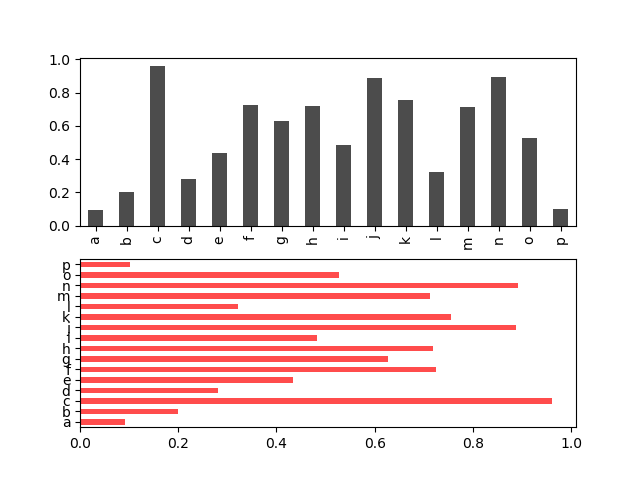

In [107]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

In [108]:
data.plot.barh(ax=axes[1], color='r', alpha=0.7)

Genus         A         B         C         D
one    0.997122  0.900611  0.966171  0.547678
two    0.719907  0.781536  0.293600  0.554299
three  0.967011  0.411717  0.021402  0.791074
four   0.373873  0.920847  0.780453  0.575405
five   0.230971  0.534458  0.822312  0.377731
six    0.398077  0.297227  0.325005  0.867386


<IPython.core.display.Javascript object>


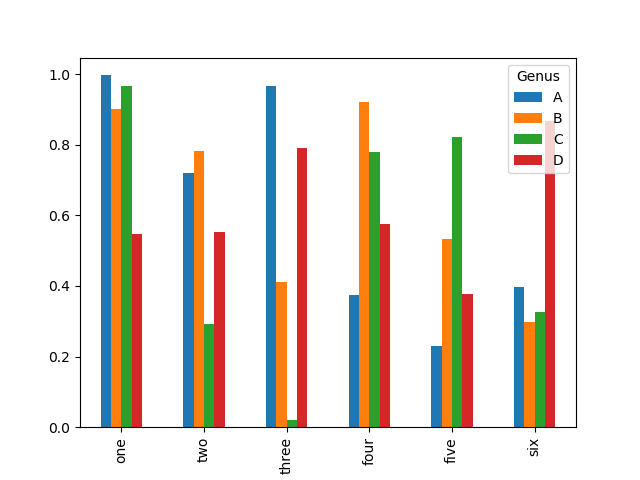

In [110]:
# - 对于DataFrame，柱状图会将每一行的值分为一组，并排显示，
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
print(df)
df.plot.bar()
# 注意name属性Genus被用作了图例的标题

- 设置stacked=True即可为DataFrame生成堆积柱状图，这样每行的值就会被堆积在一起

<IPython.core.display.Javascript object>


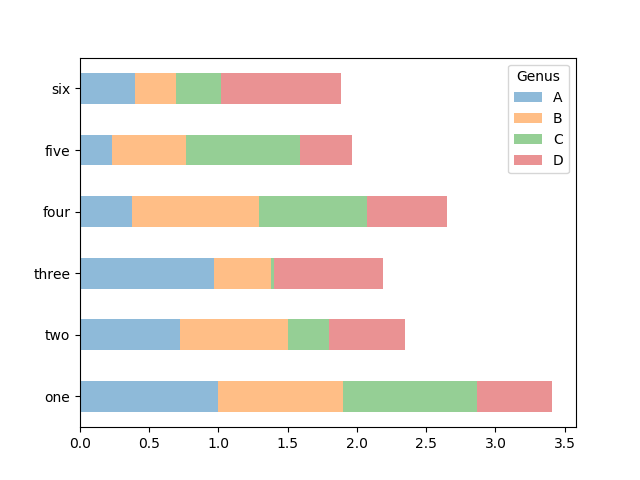

In [111]:
df.plot.barh(stacked=True, alpha=0.5)

#### 笔记：柱状图有一个非常不错的用法：利用value_counts图形化显示Series中各值的出现频率，比如s.value_counts().plot.bar()

- 做一张堆积柱状图以展示每天各种聚会规模的数据点的百分比。用read_csv将数据加载进来，然后
根据日期和聚会规模创建一张交叉表

In [3]:
import pandas as pd
import numpy as np

tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
print(party_counts)
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]
party_counts

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3


size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [4]:
party_counts = party_counts.div(party_counts.sum(1),axis=0)
party_counts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


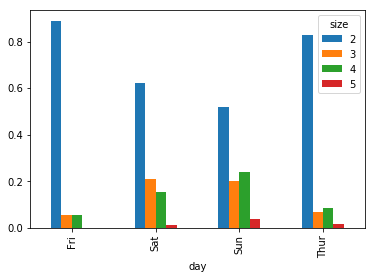

In [7]:
import matplotlib.pyplot as plt
party_counts.plot.bar()
plt.show()

In [8]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


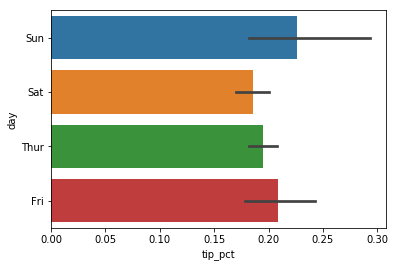

In [9]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')
plt.show()


seaborn的绘制函数使用data参数，它可能是pandas的DataFrame。其它的参数
是关于列的名字。因为一天的每个值有多次观察，柱状图的值是tip_pct的平均值。绘制在柱状图上的黑线代表95%置信区间（可以通过可选参数配置）。

- seaborn.barplot颜色选项hue色调、色度

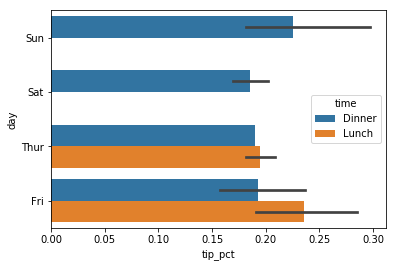

In [11]:
sns.barplot(x='tip_pct', y='day',hue='time', data=tips, orient='h')
plt.show()

- seaborn已经自动修改了图形的美观度：默认调色板，图形背景和网格线的
颜色。可以用seaborn.set在不同的图形外观之间切换

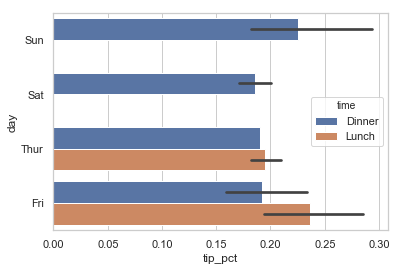

In [14]:
sns.barplot(x='tip_pct', y='day',hue='time', data=tips, orient='h')
sns.set(style='whitegrid')
plt.show()

## 直方图和密度图

直方图（histogram）是一种可以对值频率进行离散化显示的柱状图。数据点被拆
分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。再以前面那个
小费数据为例，通过在Series使用plot.hist方法，我们可以生成一张“小费占消费
总额百分比”的直方图

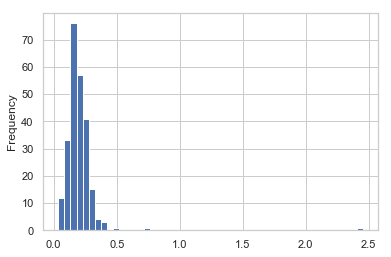

In [16]:
tips['tip_pct'].plot.hist(bins=50)
plt.show()

与此相关的一种图表类型是密度图，它是通过计算“可能会产生观测数据的连续概
率分布的估计”而产生的。一般的过程是将该分布近似为一组核（即诸如正态分布
之类的较为简单的分布）。
- 因此，密度图也被称作KDE（Kernel Density
Estimate，核密度估计）图。
- 使用plot.kde和标准混合正态分布估计即可生成一张
密度图

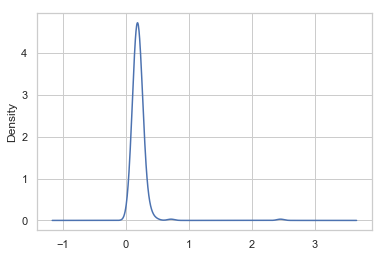

In [17]:
tips['tip_pct'].plot.density()
plt.show()

- seaborn的distplot方法绘制直方图和密度图更加简单，还可以同时画出直方图和
连续密度估计图。
- 作为例子，考虑一个双峰分布，由两个不同的标准正态分布组成

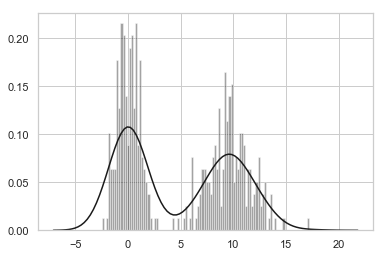

In [20]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
# values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

## 散布图或点图
- 点图或散布图是观察两个一维数据序列之间的关系的有效手段。
- 在下面这个例子中，加载了来自statsmodels项目的macrodata数据集，选择了几个变量，然后
计算对数差

In [21]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
transfer_data = np.log(data).diff().dropna()
transfer_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


- 然后可以使用seaborn的regplot方法，它可以做一个散布图，并加上一条线性回
归的线

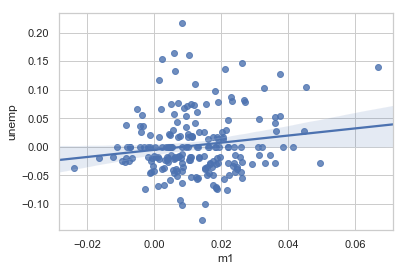

In [22]:
sns.regplot('m1', 'unemp', data=transfer_data)

- 在探索式数据分析工作中，同时观察一组变量的散布图是很有意义的，这也被称为
散布图矩阵（scatter plot matrix）。
- 纯手工创建这样的图表很费工夫，所以seaborn提供了一个便捷的pairplot函数，它支持在对角线上放置每个变量的直方
图或密度估计

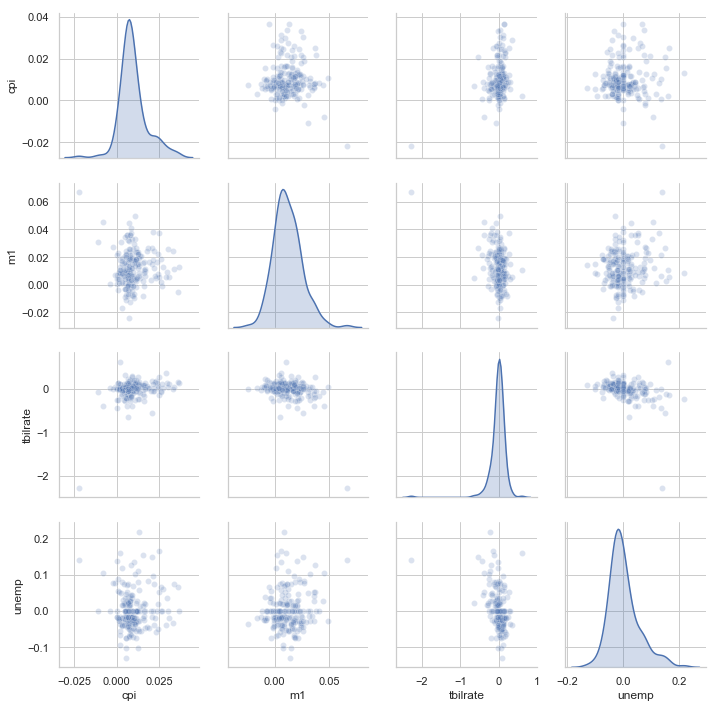

In [23]:
sns.pairplot(transfer_data,diag_kind='kde', plot_kws={'alpha':0.2})
# diag_kind diagonal对角线，帮助理解

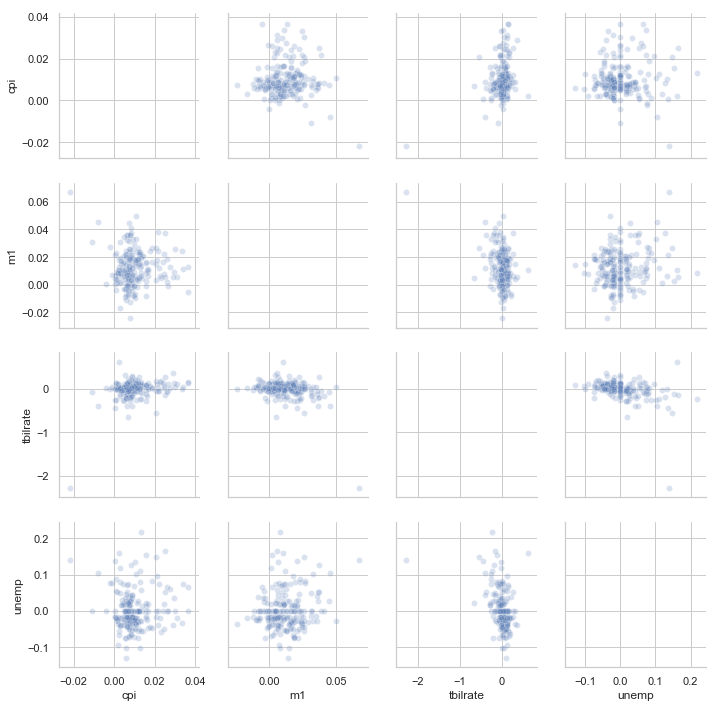

In [24]:
sns.pairplot(transfer_data,diag_kind='scatter', plot_kws={'alpha':0.2})

## 分面网格（facet grid）和类型数据 要是数据集有额外的分组维度呢？
- 有多个分类变量的数据可视化的一种方法是使用小面网格。
- seaborn有一个有用的内置函数factorplot，可以简化制作多种分面图。
看起来像数据分类后成图？

d:\python35\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


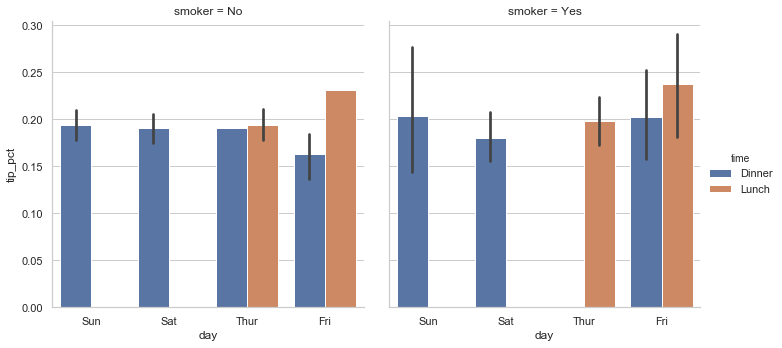

In [25]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
              kind='bar', data=tips[tips.tip_pct < 1])

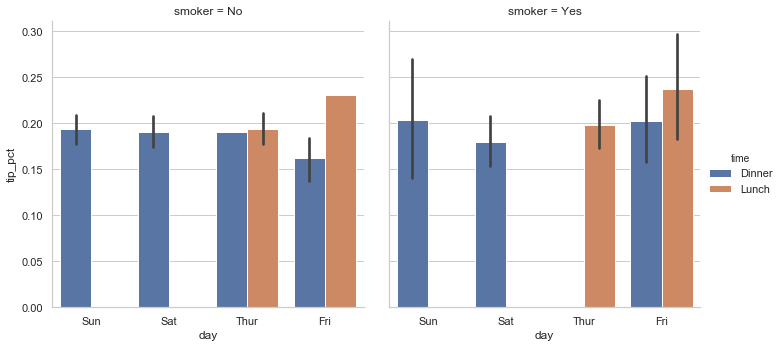

In [26]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
              kind='bar', data=tips[tips.tip_pct < 1])

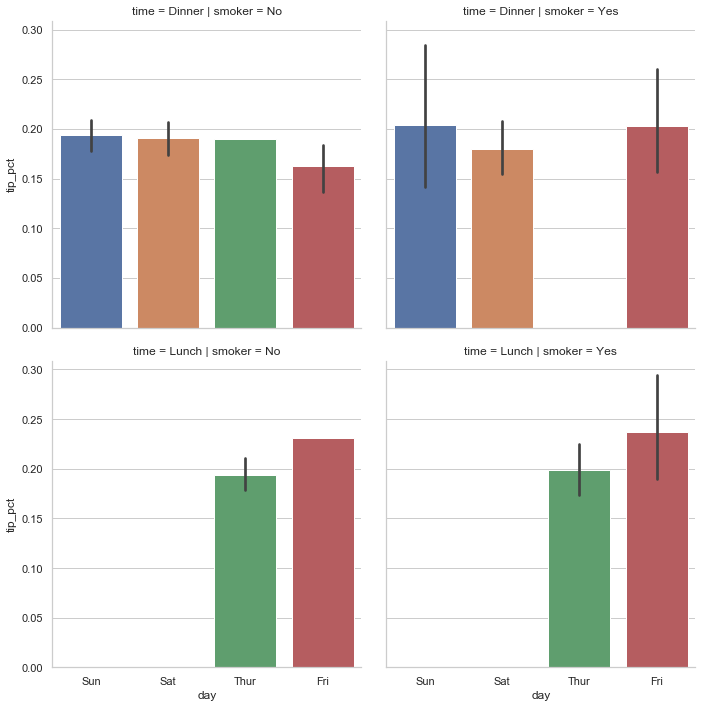

In [28]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker',
              kind='bar', data=tips[tips.tip_pct < 1])

#### factorplot(替代为catplot)支持其它的绘图类型，例如，盒图（它可以显示中位
数，四分位数，和异常值）就是一个有用的可视化类型

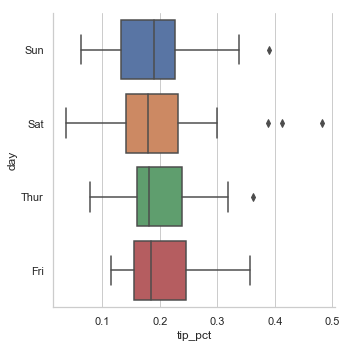

In [30]:
sns.catplot(x='tip_pct',y='day',kind='box',data=tips[tips.tip_pct < 0.5])